
# Data and computations for paper 

Lars G. Johnsen
National Library of Norway

In [2]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
mu.update('collocations')
from collocations import dist_coll_urn, urn_coll, calculate_midpoint, dist
import pandas as pd

Updated file `C:\Users\yoons\Documents\GitHub\newspapers_coll_conc\collocations.py`

In [3]:
def df_jaccard(df, col1, col2, number=100, asc=False):
    s1 = df.sort_values(by=col1, ascending=asc)[:number].index
    s2 = df.sort_values(by=col2, ascending=asc)[:number].index
    
    #print(len(set(s1)&set(s2)))
    
    return jaccard(s1, s2)

In [4]:
def jaccards(s1, s2):
    return len(set(s1)&set(s2)),len(set(s1)|set(s2))

In [5]:
def jaccard(s1, s2):
    return len(set(s1)&set(s2))/len(set(s1)|set(s2))

In [6]:
def large_corpus_dist_coll(collword, urns = None, after= 10, before = 0, n = 300):
    colls_freq = []
    colls_dist = []
    coll = pd.DataFrame()
    for i in range(0, len(urns), n):
        a = urn_coll(collword, urns = urns[i:i + n], after= after, before = before)
        colls_freq.append(nb.frame(a['freq']))
        colls_dist.append(nb.frame(a['dist']))
    coll['freq'] = pd.concat(colls_freq, axis=1, sort=False).sum(axis=1)
    coll['dist'] = pd.concat(colls_dist, axis = 1, sort=False).mean(axis=1)
    coll['dist_score'] = round(dist(coll['dist'], calculate_midpoint(before, after), coll['freq']), 2)
    return coll

In [7]:
def large_corpus_coll(collword, urns = None, after= 5, before = 5, n = 300):
    colls = []
    for i in range(0, len(urns), n):
        colls.append(nb.urn_coll(collword, urns=urns[i:i + n], after= after, before = before))
    coll = pd.concat(colls, axis=1, sort=False).sum(axis=1)
    return pd.DataFrame(coll)

In [8]:
def make_coll_df(small, large, tot):
    """take two collocations, small and large, and a reference tot. The reference must av a column call tot as well"""
    coll = pd.DataFrame()
    coll['small'] = small['freq']
    coll['large'] = large['freq']
    #coll['ratio'] = coll['small']/coll['large']
    coll['srel'] = coll.small/coll.small.sum()
    coll['lrel'] = coll.large/coll.large.sum()
    coll['ratio'] = coll.srel/coll.lrel
    coll['adjusted'] = coll.small**0.01*coll.ratio
    coll['nb'] = coll.small/tot.tot
    return coll

In [9]:
import pandas as pd

In [10]:
def make_dcoll_df(dists, norm, tot):
    
    return nb.frame(
        {
        'score':(dists.freq/dists.freq.sum())**0.01*abs(norm/dists['2']), 
        'dist':dists['1'],
        'nb':(dists.freq/dists.freq.sum())/tot.tot
        }
    ).transpose()

### Reference corpus

The reference is the total counts from approximately 450 000 books from nb.no

In [11]:
tot = nb.frame(nb.totals(50000), 'tot')

In [12]:
nb.normalize_corpus_dataframe(tot)
tot.head()

,tot
.,0.058921
",",0.051453
og,0.025297
i,0.021425
det,0.012728


# Corpus

The corpus for doing collocations is a sample of 800 books from fictional literature, dewey decimal code 813.

In [13]:
smd = 5
lmd = 10
collword = 'spise'

# Store the data subsequent use

In [14]:
a1 = pd.read_csv('kaffe_large_after.csv', index_col=0)
a2 = pd.read_csv('kaffe_small_after.csv', index_col=0)
b1 = pd.read_csv('kaffe_large_before.csv', index_col=0)
b2 = pd.read_csv('kaffe_small_before.csv', index_col=0)


## Create collocation dataframe 

Based on data from a1 and a2, and b1 and b2. The name for the collocations after is `coll` while `collb` is for the collocates coming before.

In [15]:
coll = make_dcoll_df(a1, lmd, tot)

In [16]:
collb = make_dcoll_df(b1, lmd, tot)

## Sorting 

Sorting on the reference is by column 'nb'

In [17]:
coll.sort_values(by='score', ascending=False)[:20][:20].fillna(0).style.background_gradient()

,dist,nb,score
underveis,1.66667,1.32265,4.17602
avec,1.95,1.978,3.84146
spedd,1,0,3.55632
leser,2.29167,0.992111,3.52145
Nan,2.26667,4.69276,3.51839
skvalpet,2.33333,0,3.46728
imens,2.375,9.33578,3.41474
cognac,2.375,0,3.38612
plastbegre,2.27778,0,3.35016
snackbaren,2.28571,0,3.33771


In [18]:
coll.sort_values(by='nb', ascending=False)[:20].fillna(0).style.background_gradient()

,dist,nb,score
kannen,4.31701,303.431,2.13028
rundstykker,3.44209,301.177,2.66616
koppen,5.41732,225.273,1.72403
koppene,4.29597,199.354,2.13687
Kaffen,5.39167,174.212,1.70179
smørbrød,3.21398,163.889,2.8712
krus,4.72882,148.93,1.9571
bacon,3.8658,139.32,2.38222
konjakk,3.67623,122.044,2.50654
kruset,5.19182,104.536,1.77557


In [19]:
coll.loc[[',','.', 'og','eller', 'i', 'på']]

,dist,nb,score
",",4.633483,0.961753,2.095867
.,4.630460,1.385608,2.106387
og,3.952513,1.786278,2.454444
eller,3.288994,1.104644,2.868286
i,5.156779,0.787374,1.860464
på,5.598055,1.903344,1.715635


# collb

In [20]:
collb.sort_values(by='nb', ascending=False)[:20].fillna(0).style.background_gradient()

,dist,nb,score
kopp,-1.31029,1729.24,7.35483
kanne,-1.60046,928.189,5.82774
skjenket,-2.86445,735.904,3.31215
krus,-2.43506,426.641,3.83403
drakk,-1.80221,357.668,5.30523
rykende,-2.04403,302.729,4.52037
bestilte,-2.91947,298.771,3.2162
skjenke,-2.78529,292.342,3.33729
kopper,-1.92744,285.53,4.87098
slurk,-1.48197,262.883,6.30713


In [21]:
collb.sort_values(by='score', ascending=False)[:40].fillna(0).style.background_gradient()

,dist,nb,score
nykokt,-1.02424,0,8.81782
nytrukket,-1.07326,0,8.40938
tyrkisk,-1,34.4654,8.14018
nytraktet,-1.20894,0,7.4493
kopp,-1.31029,1729.24,7.35483
Mer,-1.24573,16.2943,7.28137
svart,-1.30184,36.598,7.18231
kruttsterk,-1.20513,0,7.1535
lunken,-1.28339,132.695,6.91214
glovarm,-1.24872,0,6.88085


In [29]:
collb.sort_values(by='nb', ascending=False).loc[['sterk', 'kruttsterk']].fillna(0).style.background_gradient()

,dist,nb,score
sterk,-1.91235,12.8283,4.87241
kruttsterk,-1.20513,0,7.1535


# coll

# jaccard similarity

compare over a range

In [30]:
rng = range(2,40,2)

# for collb

In [31]:
jaccard_scoresb = nb.frame({'ratio': {x:df_jaccard(collb, 'nb', 'score', x) for x in rng}
                            }).transpose()

Text(0, 0.5, 'Jaccard score')

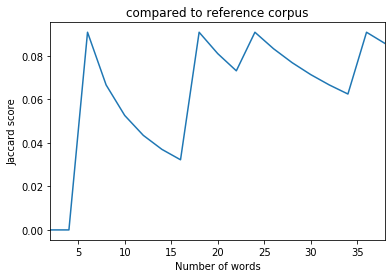

In [32]:
ax = jaccard_scoresb['ratio'].plot(title='compared to reference corpus');
ax.set_xlabel("Number of words")
ax.set_ylabel("Jaccard score")

# for coll

In [36]:
jaccard_scores = nb.frame({'ratio': {x:df_jaccard(coll, 'nb', 'score', x) for x in rng}     }).transpose()

Text(0, 0.5, 'Jaccard score')

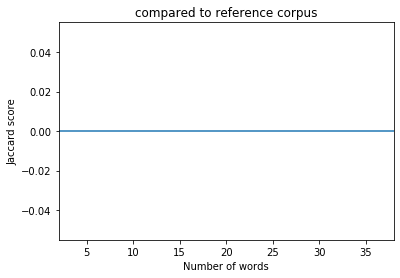

In [37]:
ax = jaccard_scores['ratio'].plot(title='compared to reference corpus');
ax.set_xlabel("Number of words")
ax.set_ylabel("Jaccard score")